In [1]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#Copy the data file to Colab
!cp '/gdrive/MyDrive/PotholeDetection/Data/Annotated/train.tar.gz' '/content/train.tar.gz'

In [3]:
!ls -l

total 1438120
drwxr-xr-x 1 root root       4096 Mar  5 14:37 sample_data
-rw------- 1 root root 1472626254 Mar 12 15:12 train.tar.gz


In [4]:
#unzip training and test data
!tar -zxvf train.tar.gz

Streaming output truncated to the last 5000 lines.
train/Japan/annotations/xmls/Japan_009766.xml
train/Japan/annotations/xmls/Japan_006254.xml
train/Japan/annotations/xmls/Japan_008726.xml
train/Japan/annotations/xmls/Japan_004664.xml
train/Japan/annotations/xmls/Japan_007945.xml
train/Japan/annotations/xmls/Japan_006391.xml
train/Japan/annotations/xmls/Japan_005903.xml
train/Japan/annotations/xmls/Japan_008200.xml
train/Japan/annotations/xmls/Japan_003663.xml
train/Japan/annotations/xmls/Japan_001949.xml
train/Japan/annotations/xmls/Japan_011141.xml
train/Japan/annotations/xmls/Japan_003141.xml
train/Japan/annotations/xmls/Japan_002870.xml
train/Japan/annotations/xmls/Japan_008094.xml
train/Japan/annotations/xmls/Japan_007381.xml
train/Japan/annotations/xmls/Japan_012963.xml
train/Japan/annotations/xmls/Japan_007843.xml
train/Japan/annotations/xmls/Japan_004889.xml
train/Japan/annotations/xmls/Japan_011099.xml
train/Japan/annotations/xmls/Japan_003745.xml
train/Japan/annotations/xmls/

In [5]:
!ls -l

total 1438124
drwxr-xr-x 1 root root       4096 Mar  5 14:37 sample_data
drwxrwxr-x 5 1000 1000       4096 May 11  2020 train
-rw------- 1 root root 1472626254 Mar 12 15:12 train.tar.gz


In [6]:
#Number of images
!ls -l train/India/images| wc -l

7707


In [7]:
img_path = '/content/train/India/images/'
xml_path = '/content/train/India/annotations/xmls/'

In [8]:
import os
import pandas as pd
#list the files
filelist = os.listdir('/content/train/India/images/') 
df = pd.DataFrame(filelist, columns=['filename'])
df.head()

,filename
0,India_000440.jpg
1,India_000915.jpg
2,India_008150.jpg
3,India_000110.jpg
4,India_002413.jpg


In [9]:
#df.head()

In [10]:
import os
import glob
import pandas as pd
import argparse
import xml.etree.ElementTree as ET
#Now create the masks using the bounding rects which are present in the annotations folder
#loop into each image name and get its xml file and prepare the mask png
xml_list = []
for pngname in df['filename']:
  xmlname = pngname.replace('.jpg','.xml')
  tree = ET.parse('/content/train/India/annotations/xmls/'+xmlname)
  root = tree.getroot()
  size = root.find('size')
  if (len(root.findall('object')) == 0):
    value = ('/content/train/India/images/' + root.find('filename').text,
              int(size.find('width').text),
              int(size.find('height').text),
              'No',
              int(0),
              int(0),
              int(0),
              int(0)
              )
    xml_list.append(value)
  else:
    for member in root.findall('object'):
        #try:
        bndbox = member.find('bndbox')
        #print(len(bndbox))
        value = ('/content/train/India/images/' + root.find('filename').text,
                    int(size.find('width').text),
                    int(size.find('height').text),
                    'Yes',
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text)
                    )
        xml_list.append(value)
      #except Exception as e:
      #    pass          
column_name = ['filename', 'width', 'height',
                'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name)
xml_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,/content/train/India/images/India_000440.jpg,720,720,Yes,12,404,457,709
1,/content/train/India/images/India_000915.jpg,720,720,Yes,283,470,512,555
2,/content/train/India/images/India_000915.jpg,720,720,Yes,118,550,720,720
3,/content/train/India/images/India_008150.jpg,720,720,No,0,0,0,0
4,/content/train/India/images/India_000110.jpg,720,720,No,0,0,0,0


In [11]:
xml_df['class'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
xml_df['class'].value_counts()

Yes    8203
No     3921
Name: class, dtype: int64

In [13]:
#xml_df[xml_df['class']=='No'].count().reset_index()

In [14]:
#df_bar = xml_df[xml_df['class']=='Yes'].groupby('filename')['class'].count().reset_index().sort_values('class').groupby('class').count()

In [15]:
#df_bar = df_bar.reset_index()

In [16]:
#df_bar

In [17]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = df_bar.sort_values('class')['class']
# students = df_bar.sort_values('class')['filename']
# ax.bar(langs,students)
# plt.show()

In [18]:
df = xml_df

In [19]:
#Use Label encoder available in Scikit Learn
from sklearn import preprocessing

In [20]:
#Label Encode class and add a 'label' column to the dataframe
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['class'])
df['label'] = df['label'].astype(str)
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,label
0,/content/train/India/images/India_000440.jpg,720,720,Yes,12,404,457,709,1
1,/content/train/India/images/India_000915.jpg,720,720,Yes,283,470,512,555,1
2,/content/train/India/images/India_000915.jpg,720,720,Yes,118,550,720,720,1
3,/content/train/India/images/India_008150.jpg,720,720,No,0,0,0,0,0
4,/content/train/India/images/India_000110.jpg,720,720,No,0,0,0,0,0


In [21]:
IMAGE_SIZE = 128

In [22]:
!rm -r masks

rm: cannot remove 'masks': No such file or directory


In [23]:
#create a directory for storing the masks
!mkdir masks

In [24]:
from PIL import Image
import numpy as np

for pngname in df['filename']:
  mask_df = xml_df[xml_df['filename']==pngname]
  maskimg = np.zeros((IMAGE_SIZE, IMAGE_SIZE))
  for idx, row in mask_df.iterrows():
    x1 = int(row['xmin'] * IMAGE_SIZE / row['width'])
    x2 = int(row['xmax'] * IMAGE_SIZE / row['width'])
    y1 = int(row['ymin'] * IMAGE_SIZE / row['height'])
    y2 = int(row['ymax'] * IMAGE_SIZE / row['height'])
    maskimg[x1:x2, y1:y2] = 1
  Image.fromarray((maskimg * 255).astype('uint8'), mode='L').save('masks/'+os.path.basename(pngname))

In [25]:
!ls -l masks

total 30824
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000000.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000001.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000002.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:12 India_000003.jpg
-rw-r--r-- 1 root root  903 Mar 12 15:13 India_000005.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000007.jpg
-rw-r--r-- 1 root root  598 Mar 12 15:13 India_000010.jpg
-rw-r--r-- 1 root root  616 Mar 12 15:13 India_000011.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000012.jpg
-rw-r--r-- 1 root root 1098 Mar 12 15:13 India_000014.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:12 India_000016.jpg
-rw-r--r-- 1 root root  982 Mar 12 15:12 India_000017.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000018.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:12 India_000019.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000022.jpg
-rw-r--r-- 1 root root  524 Mar 12 15:13 India_000023.jpg
-rw-r--r-- 1 root root  960 Mar 12 15:13 India_000024.jpg
-r

In [26]:
!ls -l '/content/train/India/images/' | wc -l

7707


In [27]:
!ls -l masks | wc -l

7707


#### Visualizing Data

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import PIL

Split training data into training and test

In [29]:
idx = np.random.rand(len(df)) < 0.8
test_df = df[~idx]
train_df = df[idx]
test_df.reset_index(inplace=True)
train_df.reset_index(inplace=True)

In [30]:
train_df.shape, test_df.shape

((9754, 10), (2370, 10))

In [31]:
def display_mask_data(img_num, df):

    #Create a pyplot with two images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))

    #Read Seismic image and corresponding mask
    original_img = tf.keras.preprocessing.image.load_img(df.loc[img_num, 'filename'], color_mode='rgb')

    mask_img = tf.keras.preprocessing.image.load_img('masks/' + os.path.basename(df.loc[img_num, 'filename']), color_mode='grayscale')
    
    #Show both images
    ax1.set_title('Pothole')
    ax1.imshow(original_img, cmap = 'gray',interpolation = 'bilinear')
    ax1.axis('off')
    ax2.set_title('Pothole')
    ax2.imshow(mask_img, cmap = 'gray', interpolation = 'bilinear')
    ax2.axis('off')
    plt.show()

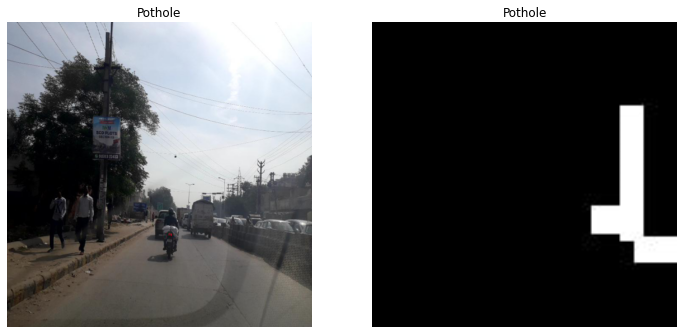

In [32]:
#Try random images
img_num = np.random.randint(0, train_df.shape[0])
display_mask_data(img_num, train_df)

#### Build Batch Generator

In [33]:
img_size = IMAGE_SIZE

In [34]:
def batch_generator(df, batch_size=32):

    while True:

        #Create random indexes
        idx = np.random.randint(0, df.shape[0], batch_size)

        #Initialize numpy arrays for X and y
        #Input image is size img_size,img_size,1
        X = np.zeros((batch_size, img_size, img_size,3))
        #Mask's size is img_size, img_size, 1
        y = np.zeros((batch_size, img_size, img_size,1))

        #Populate X and y with actual data
        for i in range(len(idx)):

            #Read image
            img = tf.keras.preprocessing.image.load_img(df.loc[idx[i],'filename'], color_mode='rgb',
                                                        target_size=(img_size, img_size, 3))
            img = tf.keras.preprocessing.image.img_to_array(img).astype('uint8')/255.0

            img = tf.keras.applications.mobilenet.preprocess_input(img)

            X[i] = img

            #Read mask
            mask_img = tf.keras.preprocessing.image.load_img('masks/' + os.path.basename(df.loc[idx[i],'filename']),
                                                            color_mode = 'grayscale',
                                                            target_size=(img_size, img_size))
            mask_img = tf.keras.preprocessing.image.img_to_array(mask_img).astype('uint8')/255.0

            y[i] = mask_img

            
        yield X, y

In [35]:
a = batch_generator(df, batch_size=2)

In [36]:
x, y = next(a)

In [37]:
x.shape

(2, 128, 128, 3)

In [38]:
y.shape

(2, 128, 128, 1)

In [39]:
np.unique(y[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.06666667, 0.07058824, 0.0745098 , 0.08627451,
       0.09411765, 0.11372549, 0.85882353, 0.88627451, 0.91764706,
       0.9254902 , 0.92941176, 0.93333333, 0.9372549 , 0.94117647,
       0.94509804, 0.94901961, 0.95294118, 0.95686275, 0.96078431,
       0.96470588, 0.96862745, 0.97254902, 0.97647059, 0.98039216,
       0.98431373, 0.98823529, 0.99215686, 0.99607843, 1.        ])

#### Build Model

Function to create two Convolutional layer block

In [64]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

model_mobilenet = MobileNet(input_shape=(img_size, img_size, 3), include_top=False, alpha=1.0, weights="imagenet")
model_mobilenet.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [65]:
tf.keras.backend.clear_session()
def create_model():
    model = MobileNet(input_shape=(img_size, img_size, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
      layer.trainable = False
  
    for layer in model.layers[83:]:
      layer.trainable = True 

    block1 = model.get_layer('conv_pw_1_relu').output
    block2 = model.get_layer('conv_pw_3_relu').output
    block3 = model.get_layer('conv_pw_5_relu').output
    block4 = model.get_layer('conv_pw_11_relu').output
    block5 = model.get_layer('conv_pw_13_relu').output

    #the lowest concatenation and first upsampling
    x = Concatenate()([UpSampling2D()(block5), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation='sigmoid')(x)
    x = Reshape((img_size,img_size))(x)

    return Model(inputs=model.input, outputs=x)

In [66]:
model = create_model()

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 32)   128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 64, 64, 32)   0           conv1_bn[0][0]                   
______________________________________________________________________________________________

In [68]:
#  metric function and loss function
def dice_coef(y_true, y_pred, smooth = 1.):
  intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=-1)
  return (2. * intersection + smooth) / (tf.keras.backend.sum(tf.keras.backend.square(y_true),-1) + tf.keras.backend.sum(tf.keras.backend.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
	return -dice_coef(y_true, y_pred)

In [73]:
tf.keras
from tf.keras import backend as K

def jaccard_distance_loss(y_true, y_pred, smooth=100):
    """
    Jaccard = (|X & Y|)/ (|X|+ |Y| - |X & Y|)
            = sum(|A*B|)/(sum(|A|)+sum(|B|)-sum(|A*B|))
    
    The jaccard distance loss is usefull for unbalanced datasets. This has been
    shifted so it converges on 0 and is smoothed to avoid exploding or disapearing
    gradient.
    
    Ref: https://en.wikipedia.org/wiki/Jaccard_index
    
    @url: https://gist.github.com/wassname/f1452b748efcbeb4cb9b1d059dce6f96
    @author: wassname
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

ModuleNotFoundError: ignored

In [72]:
#Compute IOU
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.5)
    y_pred = label(y_pred_in > 0.5)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.array(np.mean(metric), dtype=np.float32)

def my_iou_metric(label, pred):
    metric_value = tf.py_func(iou_metric_batch, [label, pred], tf.float32)
    return metric_value

In [69]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss=dice_coef_loss, optimizer=optimizer, metrics=[my_iou_metric])

In [70]:
batch_size=16
train_generator = batch_generator(train_df,batch_size=batch_size)
test_generator = batch_generator(test_df, batch_size=batch_size)

In [71]:
model.fit(train_generator,
          steps_per_epoch=train_df.shape[0]//batch_size, 
          validation_data=test_generator, 
          validation_steps=test_df.shape[0]//batch_size, 
          epochs=20)

Epoch 1/20
609/609 [==============================] - 98s 159ms/step - loss: -0.6193 - dice_coef: 0.6193 - val_loss: -0.6782 - val_dice_coef: 0.6782
Epoch 2/20
609/609 [==============================] - 96s 157ms/step - loss: -0.6841 - dice_coef: 0.6841 - val_loss: -0.6785 - val_dice_coef: 0.6785
Epoch 3/20
609/609 [==============================] - 96s 157ms/step - loss: -0.6771 - dice_coef: 0.6771 - val_loss: -0.6898 - val_dice_coef: 0.6898
Epoch 4/20
609/609 [==============================] - 95s 157ms/step - loss: -0.6742 - dice_coef: 0.6742 - val_loss: -0.6759 - val_dice_coef: 0.6759
Epoch 5/20
609/609 [==============================] - 95s 156ms/step - loss: -0.6797 - dice_coef: 0.6797 - val_loss: -0.6656 - val_dice_coef: 0.6656
Epoch 6/20
609/609 [==============================] - 96s 157ms/step - loss: -0.6804 - dice_coef: 0.6804 - val_loss: -0.6838 - val_dice_coef: 0.6838
Epoch 7/20
609/609 [==============================] - 96s 157ms/step - loss: -0.6819 - dice_coef: 0.6819 -

KeyboardInterrupt: ignored

In [ ]:
model.fit(train_generator,
          initial_epoch=20,
          steps_per_epoch=train_df.shape[0]//32, 
          validation_data=test_generator, 
          validation_steps=test_df.shape[0]//32, 
          epochs=100)

Epoch 21/100
303/303 [==============================] - 104s 343ms/step - loss: -0.7308 - dice_coef: 0.7308 - val_loss: -0.7227 - val_dice_coef: 0.7227
Epoch 22/100
303/303 [==============================] - 103s 340ms/step - loss: -0.7292 - dice_coef: 0.7292 - val_loss: -0.7211 - val_dice_coef: 0.7211
Epoch 23/100
303/303 [==============================] - 101s 334ms/step - loss: -0.7337 - dice_coef: 0.7337 - val_loss: -0.7177 - val_dice_coef: 0.7177
Epoch 24/100
303/303 [==============================] - 102s 336ms/step - loss: -0.7337 - dice_coef: 0.7337 - val_loss: -0.7209 - val_dice_coef: 0.7209
Epoch 25/100
303/303 [==============================] - 102s 336ms/step - loss: -0.7351 - dice_coef: 0.7351 - val_loss: -0.7190 - val_dice_coef: 0.7190
Epoch 26/100
303/303 [==============================] - 102s 336ms/step - loss: -0.7345 - dice_coef: 0.7345 - val_loss: -0.7200 - val_dice_coef: 0.7200
Epoch 27/100
303/303 [==============================] - 102s 335ms/step - loss: -0.7347 

In [ ]:
model.save('final_model_Unet.h5')

In [ ]:
!cp 'final_model_Unet.h5' '/gdrive/MyDrive/PotholeDetection/Code/UNet/final_model_Unet_07.03.h5'

In [ ]:
!ls -l

total 1451408
-rw-r--r-- 1 root root   13229184 Mar  7 18:30 final_model_Unet.h5
drwxr-xr-x 2 root root     372736 Mar  7 15:13 masks
drwxr-xr-x 1 root root       4096 Mar  1 14:35 sample_data
drwxrwxr-x 5 1000 1000       4096 May 11  2020 train
-rw------- 1 root root 1472626254 Mar  7 15:12 train.tar.gz


#Loading saved model

In [3]:
!cp  '/gdrive/MyDrive/PotholeDetection/Code/UNet/final_model_Unet_07.03.h5' 'final_model_Unet_07.03.h5'

In [19]:
model.load_weights('final_model_Unet_07.03.h5')

#### Model Prediction

In [ ]:
def display_model_prediction(img_num, df):

    #Read Seismic image and corresponding mask
    pothole_img = tf.keras.preprocessing.image.load_img(df.loc[img_num, 'filename'], color_mode='rgb')
    mask_img = tf.keras.preprocessing.image.load_img('masks/' + os.path.basename(df.loc[img_num, 'filename']), color_mode='grayscale')

    #Model prediction
    test_img = pothole_img.resize((img_size, img_size))
    test_img = tf.keras.preprocessing.image.img_to_array(test_img).astype('uint8')/255.0
    test_img = np.expand_dims(test_img, axis=0) #1,128,128,1

    pred = model.predict(test_img) #1,128,128,1
    
    pred[0][pred[0] <0.5] = 0
    pred[0][pred[0] >=0.5] = 1    
    #print(np.unique(pred[0]))
    #Create a pyplot with two images
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 8))

    #Show both images
    ax1.set_title('Pothole')
    ax1.imshow(pothole_img, cmap = 'gray', interpolation = 'bilinear')
    ax2.set_title('Mask Actual')
    ax2.imshow(mask_img, cmap = 'gray', interpolation = 'bilinear')
    ax3.set_title('Mask Predicted')
    ax3.imshow(np.reshape(pred[0],(img_size, img_size)), cmap = 'gray', interpolation = 'bilinear')


    plt.show()

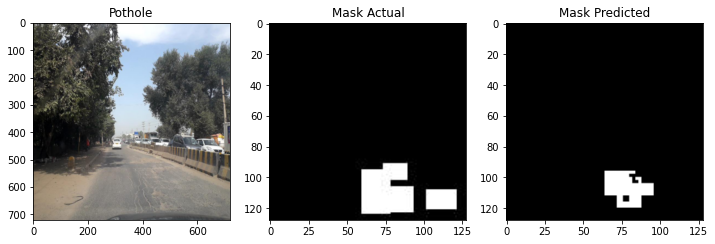

In [ ]:
img_num = np.random.randint(0, test_df.shape[0])
display_model_prediction(img_num, test_df)

In [20]:
final_test_images = '/gdrive/MyDrive/PotholeDetection/Data/Annotated/test1_India_annotations_w_potholes/finaltestimages'

In [118]:
!mkdir 'testimgs'

In [119]:
!cp -r '/gdrive/MyDrive/PotholeDetection/Data/Annotated/test1_India_annotations_w_potholes/finaltestimages' './testimgs'

In [26]:
ls -l 'testimgs/finaltestimages/' | wc -l

110


In [29]:
import os
filelist = os.listdir('./testimgs/finaltestimages/') 
len(filelist)

109

In [45]:
import pandas as pd

In [75]:
y_true = pd.read_csv('/gdrive/MyDrive/PotholeDetection/Data/Annotated/test1_India_annotations_w_potholes/y_true_109.csv')
y_true.head()

,filename,HasPotholes,x1,y1,x2,y2,width,height
0,India_000082.jpg,True,321,503,391,538,720,720
1,India_000082.jpg,True,399,506,443,525,720,720
2,India_000082.jpg,True,444,517,474,537,720,720
3,India_000082.jpg,True,362,418,430,479,720,720
4,India_000082.jpg,True,285,443,359,479,720,720


India_005736.jpg
             filename  HasPotholes   x1   y1   x2   y2  width  height
269  India_005736.jpg         True  495  559  655  636    720     720
270  India_005736.jpg         True  464  507  545  559    720     720


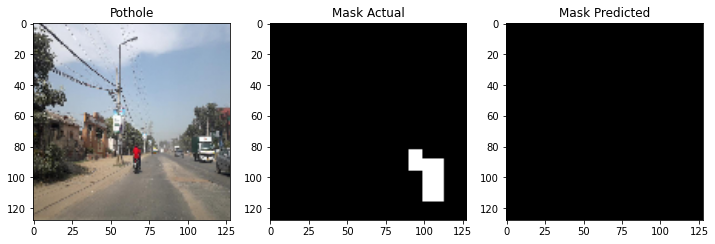

In [60]:
for filename in filelist:
  print(filename)
  imgname = './testimgs/finaltestimages/' + filename
  #Read image
  img = tf.keras.preprocessing.image.load_img(imgname, color_mode='rgb',
                                              target_size=(img_size, img_size, 3))
  img = tf.keras.preprocessing.image.img_to_array(img).astype('uint8')/255.0

  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 8))

  #Show both images
  ax1.set_title('Pothole')
  ax1.imshow(img, cmap = 'gray', interpolation = 'bilinear')

  img = tf.keras.applications.mobilenet.preprocess_input(img)

  maskimg = np.zeros((IMAGE_SIZE, IMAGE_SIZE))
  image_rows = y_true[y_true['filename']==filename]
  print(image_rows)
  for idx, row in image_rows.iterrows():
    x1 = int(row['x1'] * IMAGE_SIZE / row['width'])
    x2 = int(row['x2'] * IMAGE_SIZE / row['width'])
    y1 = int(row['y1'] * IMAGE_SIZE / row['height'])
    y2 = int(row['y2'] * IMAGE_SIZE / row['height'])
    maskimg[x1:x2, y1:y2] = 1

  pred = model.predict(np.expand_dims(img, 0))
  pred[0][pred[0] <0.5] = 0
  pred[0][pred[0] >=0.5] = 1    
  
  
  ax2.set_title('Mask Actual')
  ax2.imshow(maskimg, cmap = 'gray', interpolation = 'bilinear')
  ax3.set_title('Mask Predicted')
  ax3.imshow(np.reshape(pred[0],(img_size, img_size)), cmap = 'gray', interpolation = 'bilinear')
  
  plt.show()
  break;

In [76]:
y_true[y_true['filename']=='India_003534.jpg']

,filename,HasPotholes,x1,y1,x2,y2,width,height
149,India_003534.jpg,True,205,479,294,512,720,720
150,India_003534.jpg,True,268,432,337,456,720,720
151,India_003534.jpg,True,277,411,366,431,720,720
152,India_003534.jpg,True,306,393,346,412,720,720
153,India_003534.jpg,True,315,377,358,390,720,720
154,India_003534.jpg,True,160,421,233,442,720,720


In [113]:
import cv2
import io

In [ ]:
cat ./testimgs/finaltestimages/India_003534.jpg

205 479 89 33
268 432 69 24
277 411 89 20
306 393 40 19
315 377 43 13
160 421 73 21


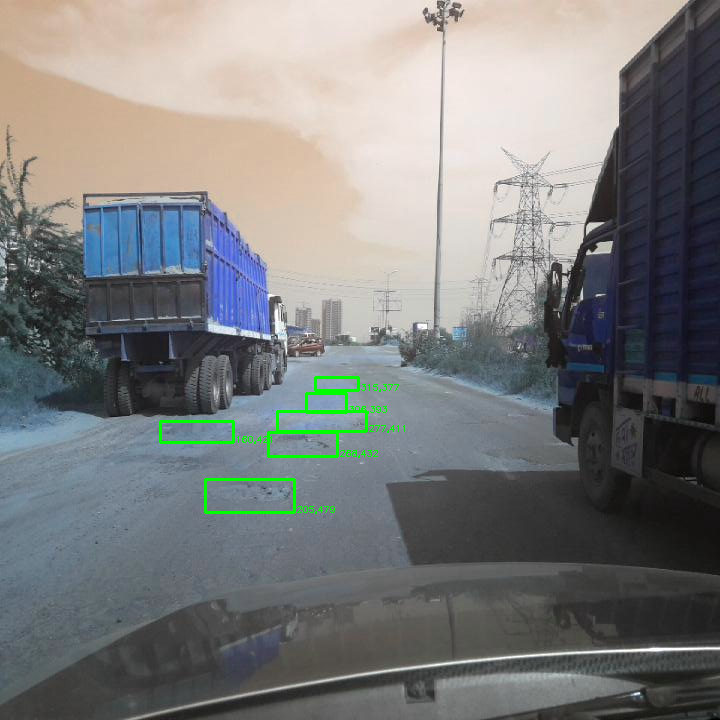

,filename,HasPotholes,x1,y1,x2,y2,width,height
149,India_003534.jpg,True,205,479,294,512,720,720
150,India_003534.jpg,True,268,432,337,456,720,720
151,India_003534.jpg,True,277,411,366,431,720,720
152,India_003534.jpg,True,306,393,346,412,720,720
153,India_003534.jpg,True,315,377,358,390,720,720
154,India_003534.jpg,True,160,421,233,442,720,720


In [131]:
from google.colab.patches import cv2_imshow
im = cv2.imread('./testimgs/finaltestimages/India_003534.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
for idx, row in y_true[y_true['filename']=='India_003534.jpg'].iterrows():
    x,y,w,h = int(row['x1']), int(row['y1']), int(row['x2'])-int(row['x1']), int(row['y2'])-int(row['y1'])
    print(x,y,w,h)
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(im,str(x) + ',' + str(y),(x+w+2,y+h),0,0.3,(0,255,0))
cv2_imshow(im)
y_true[y_true['filename']=='India_003534.jpg']
